<a href="https://colab.research.google.com/github/spiky-ganglia/action-selection/blob/master/Action_Selection_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Moment-to-Moment Action Selection NeuroMatch Dataset provided by Jeffrey Markowitz
by email July 22, 2020 \\
re: [The Striatum Organizes 3D Behavior via Moment-to-Moment Action Selection](https://www.cell.com/cell/pdf/S0092-8674(18)30512-9.pdf)

In [1]:
# load repository if not already loaded
import os

if not os.path.exists('/content/action-selection'):
  os.system('git clone https://github.com/spiky-ganglia/action-selection.git')
else:
  print('The repository data is already loaded')

### Jeffrey's notebook

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%load_ext nb_black

In [3]:
import h5py
#import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
use_file = '/content/action-selection/data/neuromatch_export.h5'

In [5]:
def printall(name, obj):
    print(name, dict(obj.attrs))

In [6]:
with h5py.File(use_file, "r") as f:
    # each session is mapped to a uuid
    uuids = list(f.keys())
    
    # print the attributes for a single dataset
    f[uuids[0]].visititems(printall) 
    
    # load in the data for the first session
    dspn_dff = f[uuids[0]]["dspn_dff"][()].ravel()
    ispn_dff = f[uuids[0]]["ispn_dff"][()].ravel()
    timestamps = f[uuids[0]]["timestamps"][()].ravel()
    syllables = f[uuids[0]]["syllables"][()].ravel()

date {'description': 'date of session', 'dtype': 'string'}
dspn_dff {'description': 'df/f for dspns (RCaMP)', 'dtype': 'single'}
ispn_dff {'description': 'df/f for ispns (GCaMP)', 'dtype': 'single'}
mouse_id {'description': 'ID of mouse', 'dtype': 'string'}
syllables {'description': 'Syllable labels (sorted by usage)', 'dtype': 'int16'}
timestamps {'description': 'timestamps in seconds', 'dtype': 'single'}


In [7]:
vals = np.linspace(0,1,256)
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.jet(vals))

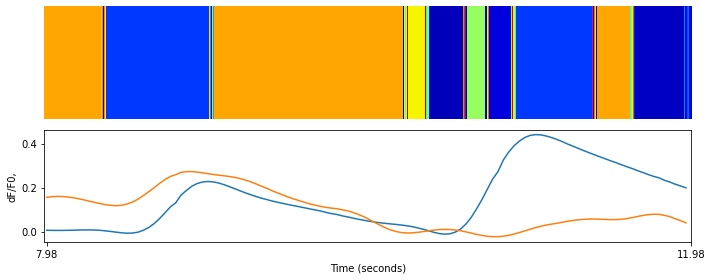

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(10, 4), sharex=True)
plt_pts = slice(240, 360)
ax[0].imshow(np.tile(syllables[plt_pts], [100, 1]), aspect="auto", cmap=cmap)
ax[0].axis("off")
ax[1].plot(ispn_dff[plt_pts])
ax[1].plot(dspn_dff[plt_pts] * 10)
ax[1].set_xticks((0, (plt_pts.stop - plt_pts.start)))
ax[1].set_xticklabels(np.around(timestamps[[plt_pts.start, plt_pts.stop]], 2))
ax[1].set_xlabel("Time (seconds)")
ax[1].set_ylabel("dF/F0,")
plt.tight_layout()

### resources

link | what it's for
--- | ---
[Python and HDF5](https://docs.google.com/viewer?a=v&pid=sites&srcid=b2JqZWN0bWFnZS5jb218cHJpdmF0ZS10cmFpbmluZ3xneDoyNWIzNmI3YWFhOTFmMjU2) | h5py info in book format
[seaborn introduction](https://seaborn.pydata.org/introduction.html) | seaborn introduces itself
[Offical seaborn tutorial](https://seaborn.pydata.org/tutorial.html#tutorial) | by Michael Waskom (also course reviewer for Neuromatch Academy courses)
[Pandas tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html) | Pandas' reference to various tutorials and getting started guides
[supplemental information](https://www.cell.com/cell/fulltext/S0092-8674(18)30512-9?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0092867418305129%3Fshowall%3Dtrue) | for the paper "The Striatum Organizes 3D Behavior via Moment-to-Moment Action Selection"


### data records
* recorded at 30 Hz, 33.33 ms per record
* 20 minutes of activity in dataset
* max slice number 35979

### project tasks

Organise tasks by priority:

task | possible methodology | completed?
--- | --- | ---
find `date` and `mouse_id` values | use hdf5 to extract and list values | yes
what data are in each dataset? | use hdf5 to list dataset structures | yes
how many unique syllables per dataset? | use hdf5 to access syllable data and count unique syllables | yes


### date field

Each dataset has a unique date and time.

In [9]:
with h5py.File(use_file, "r") as f:
  # each session is mapped to a uuid
  uuids = list(f.keys())

  for key in range(len(uuids)):
    print(uuids[key])
    date_ = f[uuids[key]]["date"][()].ravel()
    print(date_)

11a979f0-c3eb-4860-98bc-942e85986af7
['01-Jul-2017 11:07:02']
141a4484-a55e-4a72-a202-6458493482b0
['09-Jun-2017 18:23:24']
221e3512-1bfd-4f12-ad1f-e7f34c91d291
['28-Jun-2017 16:22:01']
235fecc5-f01d-4605-9efc-56736a96b824
['28-Apr-2017 14:39:03']
2924d8bb-9226-4799-916d-e751340b31a5
['12-Jun-2017 18:01:03']
2c50ef9a-be62-4888-8ab0-f4dd0ca80f2c
['18-Jul-2017 13:17:43']
37163d2d-280a-4982-acec-a11b717e86d2
['14-Jun-2017 17:57:00']
3a919b3a-d8ce-4f30-80c5-64ad44e54894
['22-Jun-2017 15:49:57']
3bc8b711-b02e-4a13-a2a1-613ad50f6da8
['09-May-2017 12:22:04']
40424ad3-bc2b-42b5-895a-300a23be355c
['22-Jun-2017 16:50:54']
4695bf1e-9561-4dfb-9371-58cd33282cf1
['08-Jun-2017 18:43:29']
518b4218-64bd-4f34-ab60-0b5b3e988bc8
['27-Jun-2017 17:32:19']
520266a4-2ccb-4601-b39e-82a342d99f60
['03-Jun-2017 10:33:09']
5aa0211f-3692-4b46-a821-d06d17ef7227
['18-Jul-2017 15:03:34']
5e43deab-1e6b-42f4-9a9f-93f6fd7e3493
['19-Jun-2017 16:35:23']
62437e0c-d207-4078-ab81-06313dc366c4
['18-Jul-2017 15:48:31']
673b4dae

### mouse id

There are 8 unique mouse id's.

In [10]:
with h5py.File(use_file, "r") as f:
  # each session is mapped to a uuid
  uuids = list(f.keys())
  mouse_id = []

  for key in range(len(uuids)):
    print(uuids[key])
    mouse_id.append(f[uuids[key]]["mouse_id"][()].ravel())
    print(mouse_id[-1])

  print('Unique mouse ids:', np.unique(np.array(mouse_id)))
  print ('Number of unique mouse ids:', np.unique(np.array(mouse_id)).shape[0])

11a979f0-c3eb-4860-98bc-942e85986af7
['1538']
141a4484-a55e-4a72-a202-6458493482b0
['1532']
221e3512-1bfd-4f12-ad1f-e7f34c91d291
['1538']
235fecc5-f01d-4605-9efc-56736a96b824
['19938']
2924d8bb-9226-4799-916d-e751340b31a5
['1554']
2c50ef9a-be62-4888-8ab0-f4dd0ca80f2c
['1554']
37163d2d-280a-4982-acec-a11b717e86d2
['19938']
3a919b3a-d8ce-4f30-80c5-64ad44e54894
['1538']
3bc8b711-b02e-4a13-a2a1-613ad50f6da8
['19842']
40424ad3-bc2b-42b5-895a-300a23be355c
['1546']
4695bf1e-9561-4dfb-9371-58cd33282cf1
['1538']
518b4218-64bd-4f34-ab60-0b5b3e988bc8
['1554']
520266a4-2ccb-4601-b39e-82a342d99f60
['1532']
5aa0211f-3692-4b46-a821-d06d17ef7227
['1555']
5e43deab-1e6b-42f4-9a9f-93f6fd7e3493
['1538']
62437e0c-d207-4078-ab81-06313dc366c4
['1546']
673b4dae-5c4e-463e-9ac6-4c48c9aa767b
['1555']
6c1c5645-e3c7-4bc7-93cd-15261fc96495
['1532']
70d80df4-7edc-44e5-b31d-ec274d4857e8
['1555']
746c4e99-3cd6-495c-9f3f-ba27446b67da
['1546']
762bf6a8-608b-49d3-932a-dfb4c3f41ecb
['1555']
76ea893c-3993-45ee-8114-9b780ce

### dataset structures

There are 48 datasets of similar structure, one for each experiment.

In [11]:
with h5py.File(use_file, "r") as f:
  # each session is mapped to a uuid
  uuids = list(f.keys())
    
  # print the uuid keys and attributes for each dataset
  for key in range(len(uuids)):
    print(uuids[key])
    f[uuids[key]].visititems(printall) 

print('number of database keys:', len(uuids))

11a979f0-c3eb-4860-98bc-942e85986af7
date {'description': 'date of session', 'dtype': 'string'}
dspn_dff {'description': 'df/f for dspns (RCaMP)', 'dtype': 'single'}
ispn_dff {'description': 'df/f for ispns (GCaMP)', 'dtype': 'single'}
mouse_id {'description': 'ID of mouse', 'dtype': 'string'}
syllables {'description': 'Syllable labels (sorted by usage)', 'dtype': 'int16'}
timestamps {'description': 'timestamps in seconds', 'dtype': 'single'}
141a4484-a55e-4a72-a202-6458493482b0
date {'description': 'date of session', 'dtype': 'string'}
dspn_dff {'description': 'df/f for dspns (RCaMP)', 'dtype': 'single'}
ispn_dff {'description': 'df/f for ispns (GCaMP)', 'dtype': 'single'}
mouse_id {'description': 'ID of mouse', 'dtype': 'string'}
syllables {'description': 'Syllable labels (sorted by usage)', 'dtype': 'int16'}
timestamps {'description': 'timestamps in seconds', 'dtype': 'single'}
221e3512-1bfd-4f12-ad1f-e7f34c91d291
date {'description': 'date of session', 'dtype': 'string'}
dspn_dff {

### unique syllables per dataset

The number of unique syllables in each dataset varies. It appears that syllable labels remain constant across all datasets (i.e. one label per syllable). There 99 unique syllables across all datasets and the maximum syllable index is 100.

In [12]:
with h5py.File(use_file, "r") as f:
  # each session is mapped to a uuid
  uuids = list(f.keys())
  syllables_ = []
    
  # print the unique syllables and number for each dataset
  for key in range(len(uuids)):
    print(uuids[key])
    syllables_.append(np.unique(f[uuids[key]]["syllables"][()].ravel()))
    print(syllables_[-1])
    print('Max syllable index:', max(syllables_[-1]))
    print('Number of unique syllables in this dataset:', len(syllables_[-1]))

syllables__ = []

for s in syllables_:
  syllables__.extend(s)

print('Number of unique syllables in all datasets:', (np.unique(np.array(syllables__))).shape[0])
print('Max syllable index in all datasets:', max(np.unique(np.array(syllables__))))

11a979f0-c3eb-4860-98bc-942e85986af7
[-5  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]
Max syllable index: 94
Number of unique syllables in this dataset: 95
141a4484-a55e-4a72-a202-6458493482b0
[-5  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 79 80 82 83 84 85 86 88 89 92 93]
Max syllable index: 93
Number of unique syllables in this dataset: 89
221e3512-1bfd-4f12-ad1f-e7f34c91d291
[-5  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 6

In [13]:
import pandas as pd
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
